In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from matplotlib import cm
from celluloid import Camera
import pickle #store

In [2]:
n = 10 #nb des noeuds
k = 80  #nb des itérations
c = 1/(n+1)

a1 = 30 #longueur de l'espace
b1 = 20 #largeur de l'espace

r_det = ( ((a1**2+b1**2)**(1/2))/5 )*2 #rayon de détection
r_sec = r_det/3  #rayon de sécurité

print(r_det)
print(r_sec)

14.422205101855956
4.8074017006186525


In [3]:
def positionToAdjMatrix(x,y,r_det):
    n=len(x)
    matrix = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            distance_ij = ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2)

            if distance_ij <= r_det :
                matrix[i][j] = 1

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    return matrix


def Laplacienne(M):
    #matrice degré
    D = np.identity(len(M[0]))
    degre = np.sum(M,axis=1)
    for i in range(n):
        D[i][i]=degre[i]
    
    #print("\n matrice degre\n",D)
    
    L = D - M
    
    return L

def adjToCom(M):
    #matrice de communication
    C = np.copy(np.array(M))
    facteur=np.sum(M,axis=1)
    C = C.astype('float')
    for i in range(n):
        if facteur[i]==0:
            facteur[i] = 1
        C[i]=C[i]/facteur[i]
    return C


def pMatrix(M):
    I = np.identity(len(M[0]))
    P = I - c*Laplacienne(M)
    
    return P

def randStocastic(n):
    matrix = np.random.rand(n,n)

    m = matrix/matrix.sum(axis=1)[:,None]
    
    return m


def matriceCom(H,W):
    
    I = np.identity(n)
    J = np.ones(n)
    Q = H + I
    Q_ = J - Q
    
    A = np.multiply(Q,W) + np.multiply(np.dot((np.multiply(W,Q_)),J),I)

    return A


def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()
    

def mouvement(x,y,A):      
    for i in range(n):
        for j in range(n):
            x[i] += (x[j]-x[i])*A[i][j]
            y[i] += (y[j]-y[i])*A[i][j]
            
    return x,y


In [4]:
#positionner les robots aléatoirement 
rnd = np.random
rnd.seed(0)

#x = rnd.choice(np.arange(0., a, 5), size=n)
#y = rnd.choice(np.arange(0., b, 5), size=n)

x = [20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]
y = [ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]



 matrice adjacence 
 [[0 0 0 1 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 1 1 1 0]
 [0 0 1 1 0 1 0 1 0 1]
 [1 1 0 1 0 1 1 0 1 1]
 [1 1 0 1 1 1 0 1 0 0]
 [0 0 1 1 0 0 1 1 0 0]]


 laplacienne 
 [[ 4.  0.  0. -1.  0. -1.  0. -1. -1.  0.]
 [ 0.  4.  0. -1. -1.  0.  0. -1. -1.  0.]
 [ 0.  0.  2.  0.  0.  0. -1.  0.  0. -1.]
 [-1. -1.  0.  7.  0. -1. -1. -1. -1. -1.]
 [ 0. -1.  0.  0.  2.  0.  0.  0. -1.  0.]
 [-1.  0.  0. -1.  0.  5. -1. -1. -1.  0.]
 [ 0.  0. -1. -1.  0. -1.  5. -1.  0. -1.]
 [-1. -1.  0. -1.  0. -1. -1.  7. -1. -1.]
 [-1. -1.  0. -1. -1. -1.  0. -1.  6.  0.]
 [ 0.  0. -1. -1.  0.  0. -1. -1.  0.  4.]]


 P 
 [[0.63636364 0.         0.         0.09090909 0.         0.09090909
  0.         0.09090909 0.09090909 0.        ]
 [0.         0.63636364 0.         0.09090909 0.09090909 0.
  0.         0.09090909 0.09090909 0.        ]
 [0.         0.         0.81818182 0.         0.         0.
  0.090909

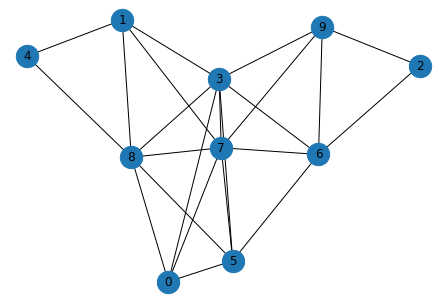

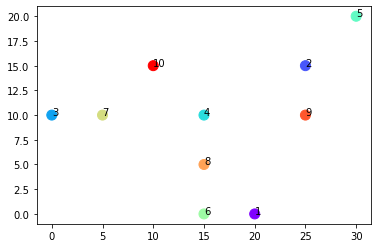

In [5]:

M = positionToAdjMatrix(x,y,r_det)
H = np.array(M).reshape(n,n)
print("\n matrice adjacence \n", H)

L = Laplacienne(M)
print("\n\n laplacienne \n", L)

P = pMatrix(H)
print("\n\n P \n",P)

print("\n\n P \n",np.linalg.matrix_power(P,100))


W = randStocastic(n)
print("\n\n matrice de priorité \n",W)

S=W
O=W

S = S.sum(axis=0)/n
print("\n\n convergence \n",S)


#matrice de communication
A = matriceCom(H,W)
print("\n\n matrice de communication :\n", A)

show_graph_with_labels(H)


colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))

In [6]:
valPropre = np.linalg.eigvals(L)
print(np.sort(valPropre, axis=0))

[-4.44089210e-16  1.16088296e+00  2.03237741e+00  3.90876698e+00
  4.26150922e+00  5.00000000e+00  6.28113763e+00  7.07055190e+00
  8.00000000e+00  8.28477390e+00]


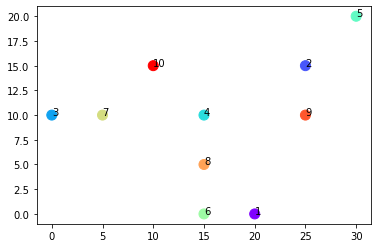

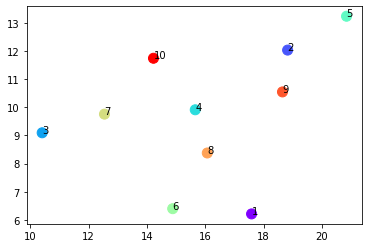

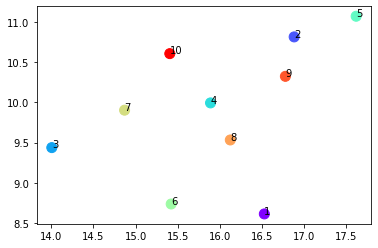

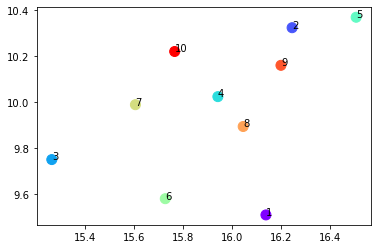

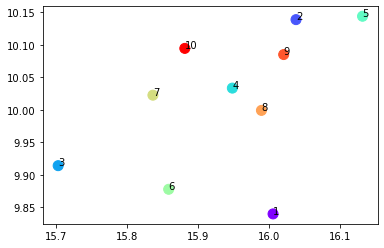

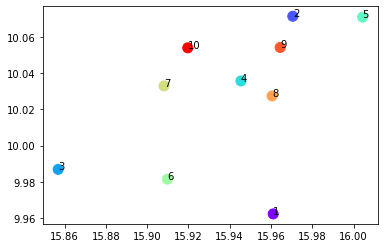

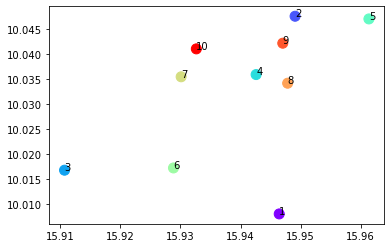

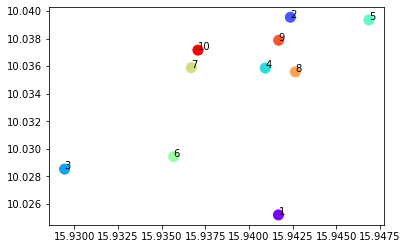

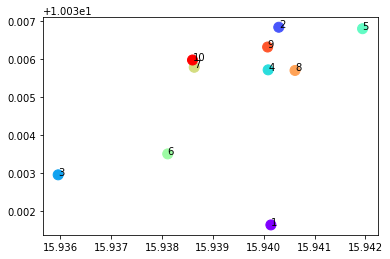

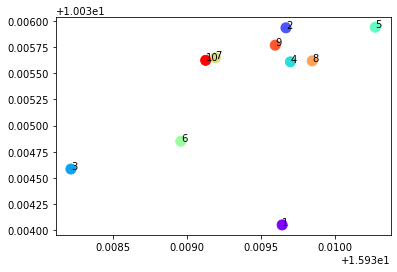

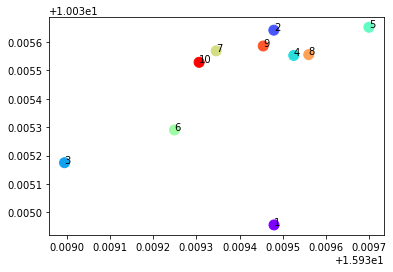

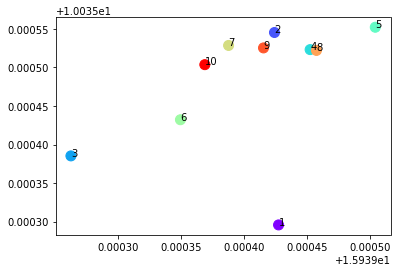

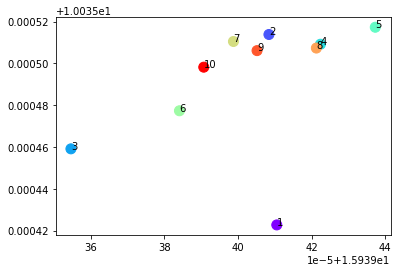

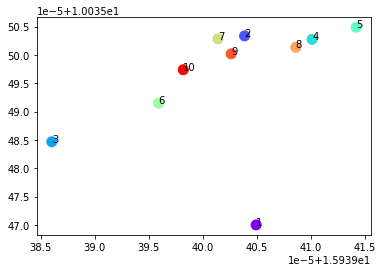

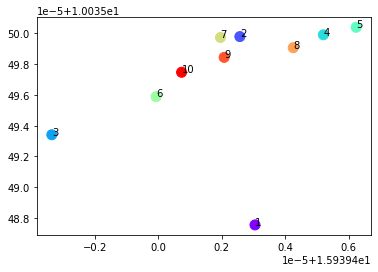

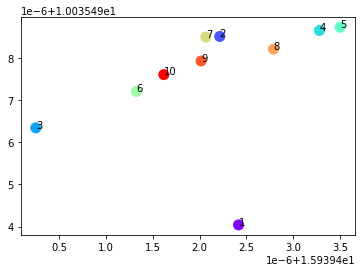

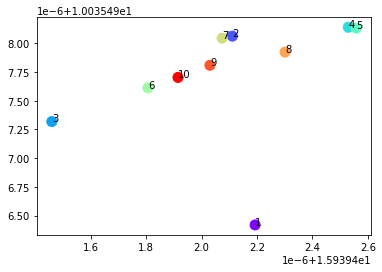

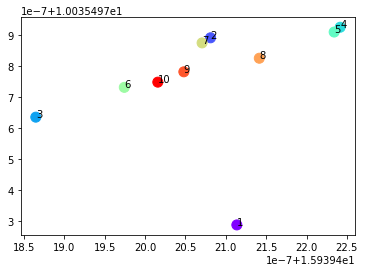

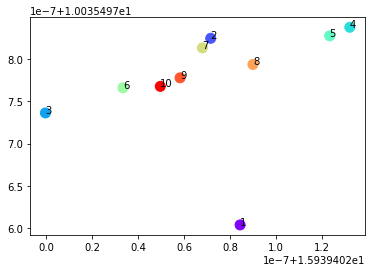

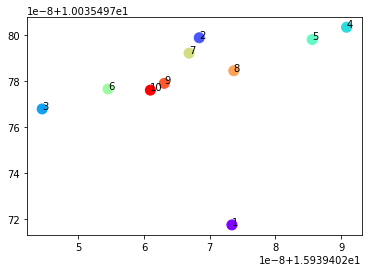

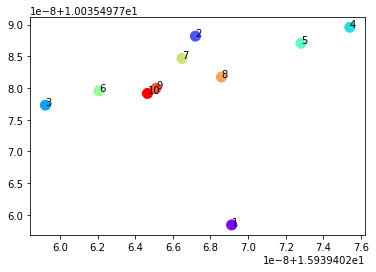

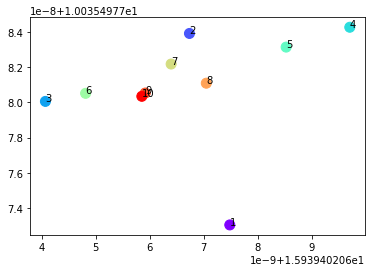

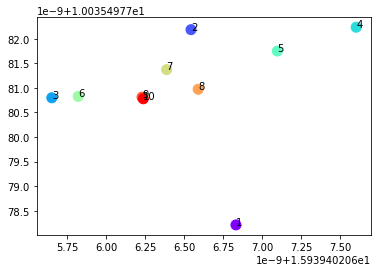

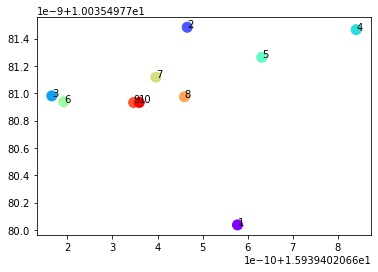

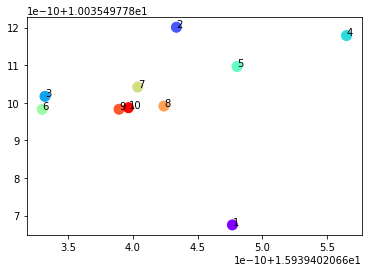

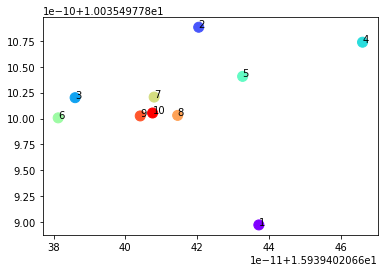

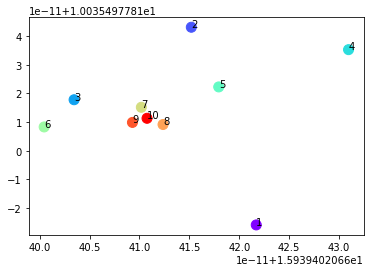

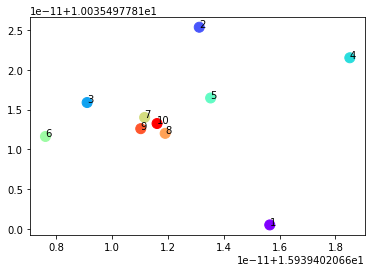

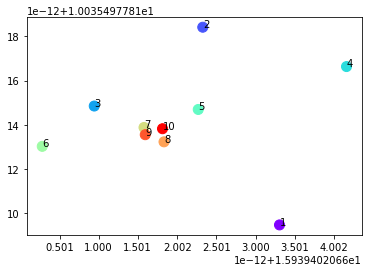

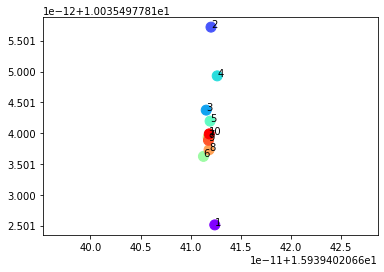

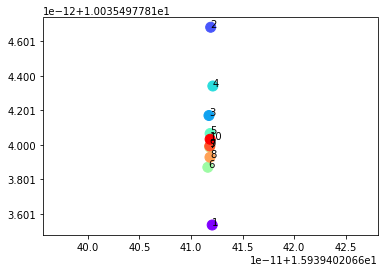

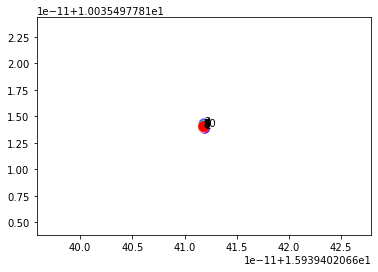

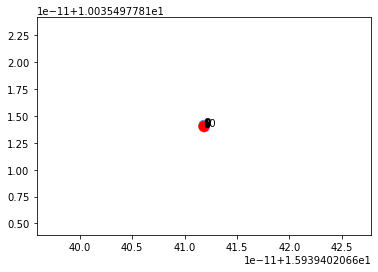

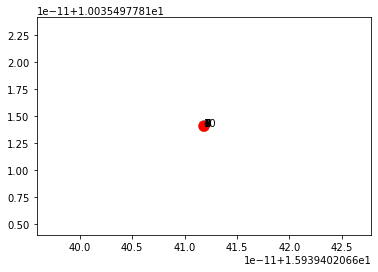

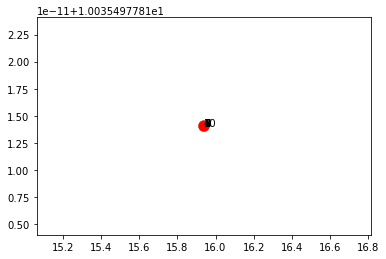

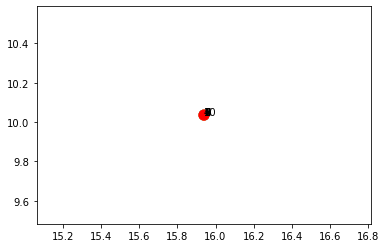

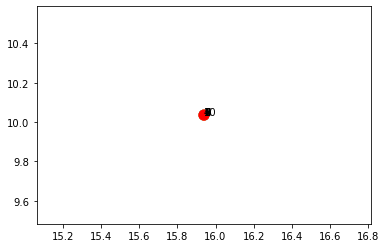

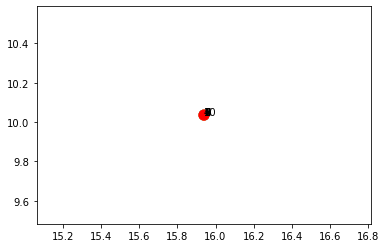

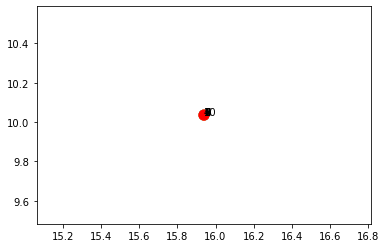

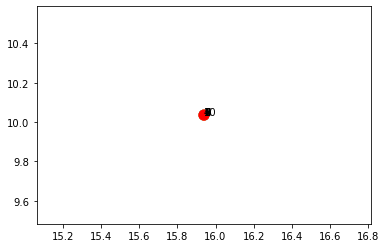

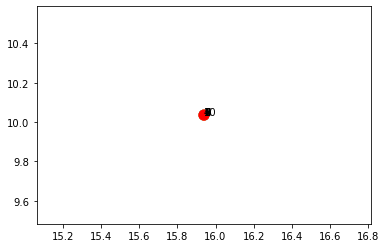

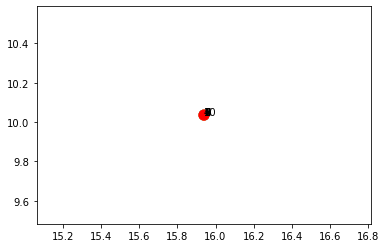

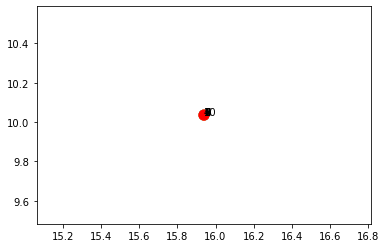

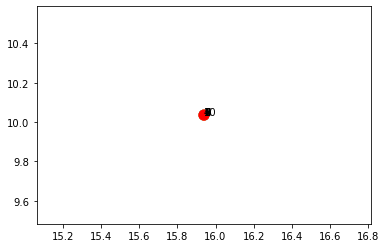

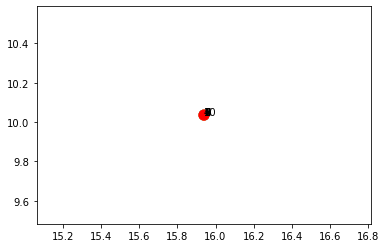

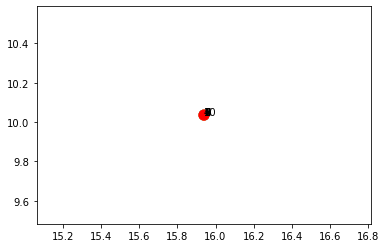

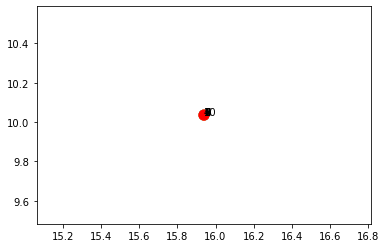

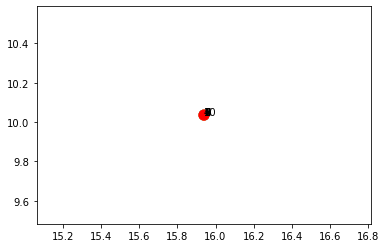

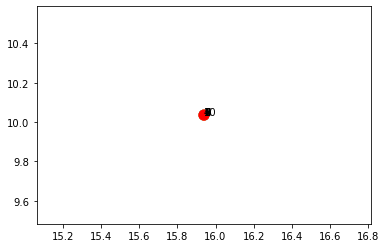

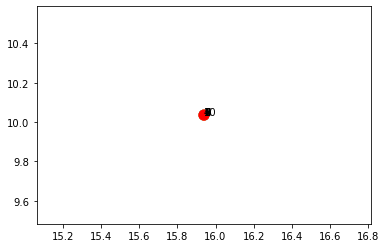

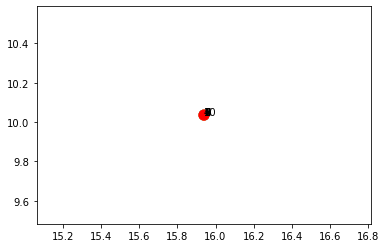

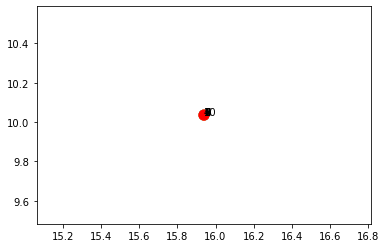

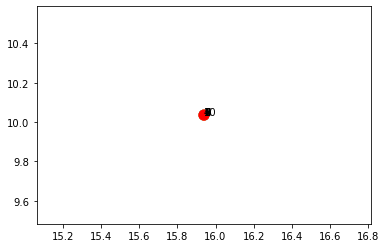

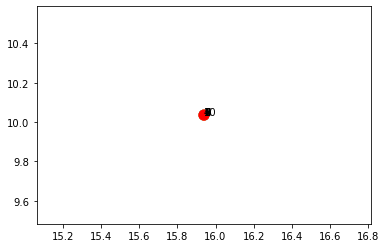

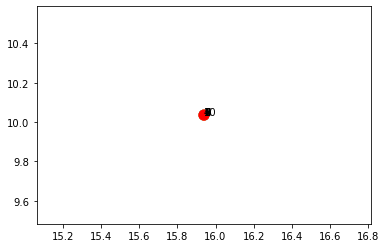

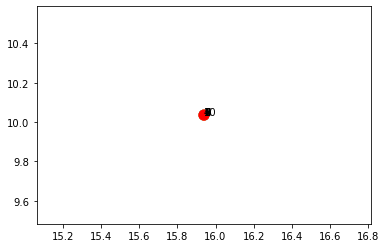

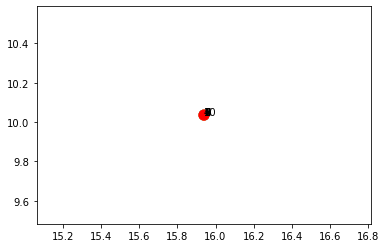

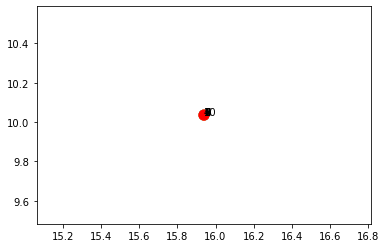

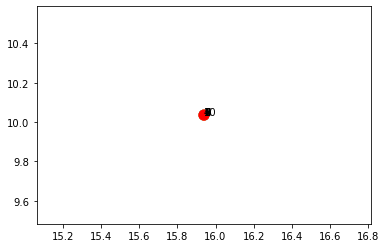

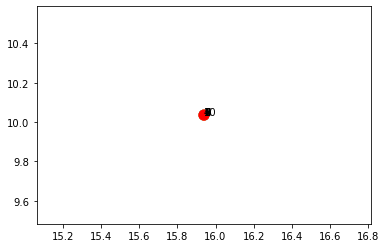

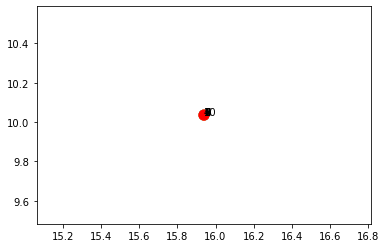

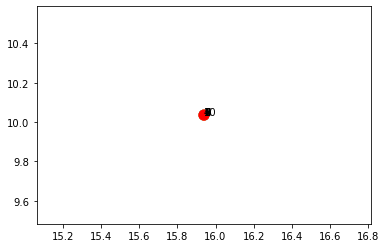

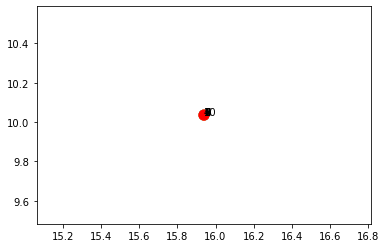

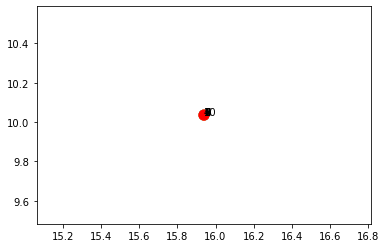

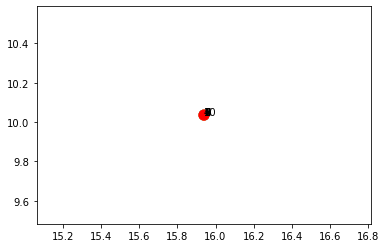

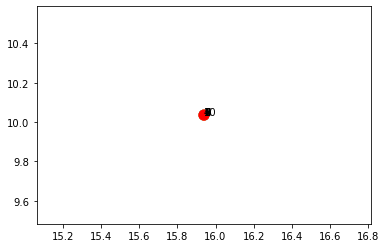

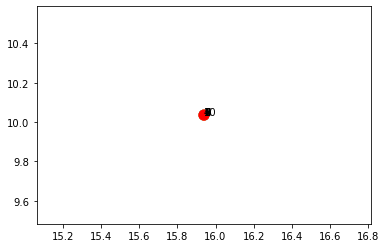

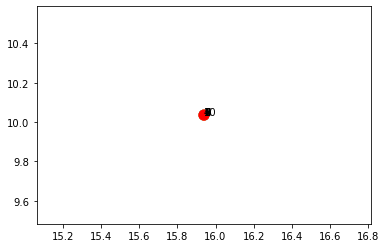

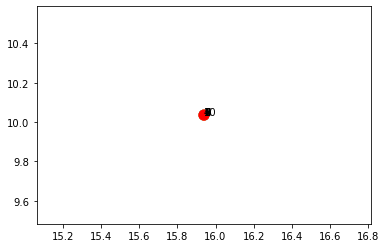

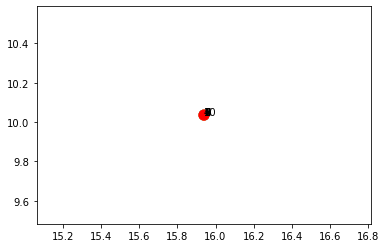

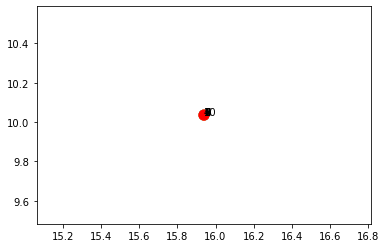

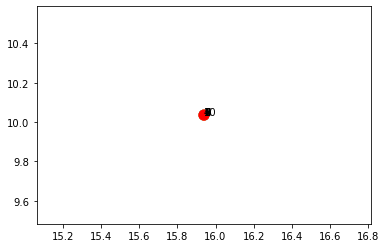

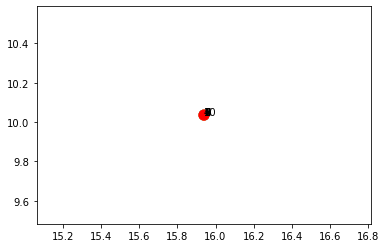

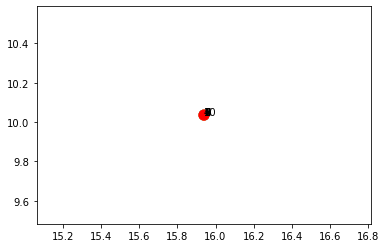

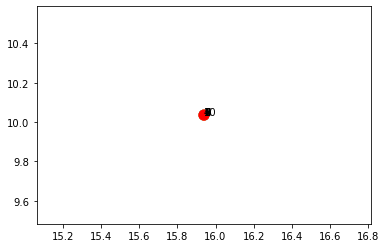

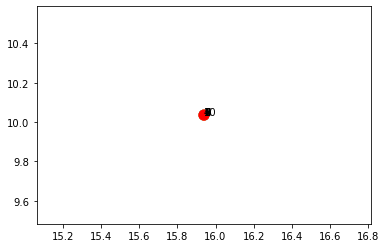

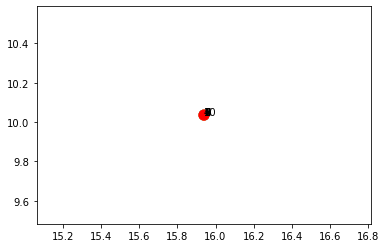

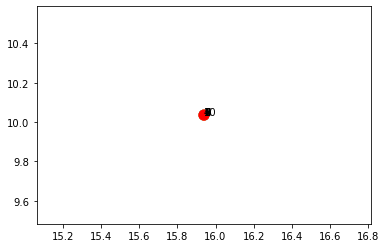

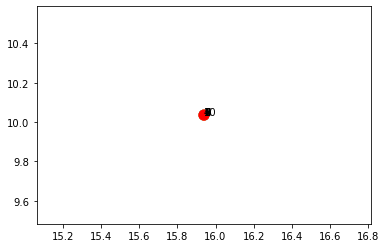

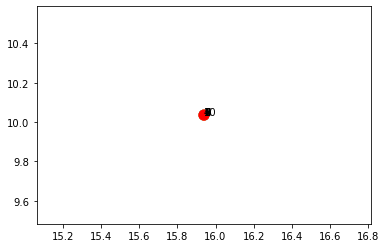



 matrice de priorité 
 [[0.10949927 0.11134165 0.12330248 0.10523659 0.0748319  0.07762864
  0.09945744 0.07461681 0.14088912 0.08319609]
 [0.10949865 0.111341   0.12330361 0.10523516 0.07483412 0.07762904
  0.09945609 0.07461599 0.1408878  0.08319855]
 [0.10950157 0.11134407 0.12329829 0.10524187 0.07482371 0.07762718
  0.09946243 0.07461986 0.140894   0.08318701]
 [0.10949951 0.1113419  0.12330205 0.10523713 0.07483106 0.0776285
  0.09945795 0.07461712 0.14088962 0.08319516]
 [0.10949771 0.11134002 0.12330531 0.10523302 0.07483745 0.07762964
  0.09945406 0.07461475 0.14088581 0.08320223]
 [0.10949948 0.11134187 0.1233021  0.10523707 0.07483116 0.07762851
  0.0994579  0.07461709 0.14088956 0.08319526]
 [0.10950029 0.11134272 0.12330063 0.10523892 0.07482829 0.077628
  0.09945965 0.07461816 0.14089128 0.08319208]
 [0.10949951 0.1113419  0.12330205 0.10523713 0.07483106 0.0776285
  0.09945795 0.07461712 0.14088962 0.08319516]
 [0.1094989  0.11134126 0.12330316 0.10523573 0.07483323 0.

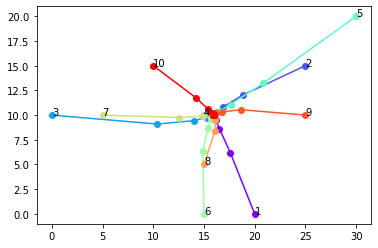

In [7]:
with open("initialCondition.pkl",'wb') as f :
    pickle.dump([x,y],f)

camera = Camera(plt.figure())

#main
X = []
Y = []

AA = [[0 for i in range(n)] for j in range(n)]

for t in range(k):
    
    X.extend(x)
    Y.extend(y)
    
    a = np.array(X).reshape(t+1,n)
    b = np.array(Y).reshape(t+1,n)
    
    #for i in range(n):
    #    plt.plot(a[:, i], b[:, i], color=colors[i])
        
    #M = positionToAdjMatrix(x,y,r_det)
    H = np.array(M).reshape(n,n)
    P = pMatrix(H)
    W = np.dot(P,W)
    A = matriceCom(H,W)
    
    C = adjToCom(M)
    
    #show_graph_with_labels(np.array(M))
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(1,n+1):
        plt.annotate(i, (x[i-1], y[i-1]))
        
    x,y = mouvement(x,y,W)
    
    AA = A
    plt.pause(1.1)
    camera.snap()
    
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

print("\n\n matrice de priorité \n",W)
print("\n\n convergence \n",S)



anim = camera.animate(blit=True)


In [8]:
print("\n A \n",AA)
print("\nA puissance 100  \n",np.linalg.matrix_power(AA, 100))

print("\n Convergence des priorité \n",S)


 A 
 [[0.60162884 0.         0.         0.10523659 0.         0.07762864
  0.         0.07461681 0.14088912 0.        ]
 [0.         0.60442694 0.         0.10523516 0.07483412 0.
  0.         0.07461599 0.1408878  0.        ]
 [0.         0.         0.81735056 0.         0.         0.
  0.09946243 0.         0.         0.08318701]
 [0.10949951 0.1113419  0.         0.30337024 0.         0.0776285
  0.09945795 0.07461712 0.14088962 0.08319516]
 [0.         0.11134002 0.         0.         0.74777417 0.
  0.         0.         0.14088581 0.        ]
 [0.10949948 0.         0.         0.10523707 0.         0.4702989
  0.0994579  0.07461709 0.14088956 0.        ]
 [0.         0.         0.12330063 0.10523892 0.         0.077628
  0.53602221 0.07461816 0.         0.08319208]
 [0.10949951 0.1113419  0.         0.10523713 0.         0.0776285
  0.09945795 0.27275024 0.14088962 0.08319516]
 [0.1094989  0.11134126 0.         0.10523573 0.07483323 0.07762888
  0.         0.07461632 0.44684568 

In [9]:
XX = (a[0]*S).sum(axis=0)
Y = (b[0]*S).sum(axis=0)

print("Prédiction de l'abscice final\n",XX)
print("\n Abscisse final de chaque agent :  \n",a[k-1])
print("\nPrédiction de l'ordonné final\n",Y)
print("\n Ordonné final de chaque agent :  \n",b[k-1])

Prédiction de l'abscice final
 15.932192862905575

 Abscisse final de chaque agent :  
 [15.93940207 15.93940207 15.93940207 15.93940207 15.93940207 15.93940207
 15.93940207 15.93940207 15.93940207 15.93940207]

Prédiction de l'ordonné final
 9.47662839423727

 Ordonné final de chaque agent :  
 [10.03549778 10.03549778 10.03549778 10.03549778 10.03549778 10.03549778
 10.03549778 10.03549778 10.03549778 10.03549778]
